In [41]:
import pandas as pd 
import numpy as np 

In [42]:
supply_df=pd.read_csv("DataCoSupplyChainDataset1.csv")
supply_df

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.25000,314.64001,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018,Standard Class
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018,Standard Class
2,CASH,4,4,-247.78000,309.72000,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018,Standard Class
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018,Standard Class
4,PAYMENT,2,4,134.21001,298.25000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.00000,399.98001,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/20/2016,Standard Class
180515,DEBIT,3,2,-613.77002,395.98001,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/19/2016,Second Class
180516,TRANSFER,5,4,141.11000,391.98001,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/20/2016,Standard Class
180517,PAYMENT,3,4,186.23000,387.98001,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/18/2016,Standard Class


In [43]:
# Assuming 'Delivery_Status' is a column with values 'On Time' or 'Late'

# Step 1: Filter the streets visited more than 100 times
street_counts = supply_df['Customer_Street'].value_counts()
high_visit_streets = street_counts[street_counts > 100].index
high_visit_df = supply_df[supply_df['Customer_Street'].isin(high_visit_streets)]

# Step 2: Filter for late deliveries in the high-visit streets DataFrame
high_visit_late_deliveries = high_visit_df[high_visit_df['Delivery_Status'] == 'Late delivery']

# Step 3: Calculate the percentage of late deliveries for high-visit streets
late_percentage = (high_visit_late_deliveries.shape[0] / high_visit_df.shape[0]) * 100

# Step 4: Print the result
print(f"Percentage of late deliveries for streets visited more than 100 times: {late_percentage}%")

## as the Percentage of late deliveries for streets visited more than 100 times: 53.98729710656316%
## balaced even for streets with count more than 100 so we can only select those values and we wont loose information or create a bias 
## which will also benefit while doing one hot encoding


Percentage of late deliveries for streets visited more than 100 times: 53.98729710656316%


In [44]:
supply_df.shape

(180519, 53)

In [45]:
supply_df.describe()

,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Id,Customer_Id,Customer_Zipcode,Department_Id,Latitude,...,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Price,Product_Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24843.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772097,183.107609,21.974989,55420.648070,692.509764,31.851451,NaN,141.232547,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31921.252921,336.446807,15.640064,NaN,139.732489,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937550,...,1.000000,9.990000,7.490000,-4274.980000,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.380000,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265430,...,1.000000,119.980000,104.380000,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990010,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144860,...,1.000000,199.920000,163.990010,31.520000,59405.000000,627.000000,29.000000,NaN,59.990000,0.0
75%,5.000000,4.000000,64.800000,247.399990,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279620,...,3.000000,299.950010,247.399990,64.800000,90008.000000,1004.000000,45.000000,NaN,199.990000,0.0
max,6.000000,4.000000,911.799990,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781930,...,5.000000,1999.989990,1939.989990,911.800000,99301.000000,1363.000000,76.000000,NaN,1999.990000,0.0


In [46]:
supply_df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Email', 'Customer_Fname', 'Customer_Id',
       'Customer_Lname', 'Customer_Password', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market',
       'Order_City', 'Order_Country', 'Order_Customer_Id',
       'order_date_(DateOrders)', 'Order_Id', 'Order_Item_Cardprod_Id',
       'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Order_Zipcode', 'Product_Card_Id', 'Product_Category_Id',
       'Product_De

# dropping these columns as they are not relevant for our objective of prediction


In [47]:
#by doing a EDA these columns can be easily dropped as they are either id columns or columns with sensitive information or product description column 
#which have no benefit for Our analysis.

columns_to_drop = ['Customer_Email', 'Customer_Fname', 'Customer_Lname', 'Customer_Password','Customer_Id',\
      'Department_Id','Order_Customer_Id', 'Order_Item_Id','Category_Id','Order_Id',\
'Product_Card_Id','Order_Item_Cardprod_Id', 'Product_Description', 'Product_Image',
]

supply_df_mod = supply_df.drop(columns=columns_to_drop, axis=1)
supply_df_mod


,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Name,Customer_City,Customer_Country,...,Order_Region,Order_State,Order_Status,Order_Zipcode,Product_Category_Id,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.25000,314.64001,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,...,Southeast Asia,Java Occidental,COMPLETE,NaN,73,Smart watch,327.75,0,2/3/2018,Standard Class
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,South Asia,Rajastan,PENDING,NaN,73,Smart watch,327.75,0,1/18/2018,Standard Class
2,CASH,4,4,-247.78000,309.72000,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,...,South Asia,Rajastan,CLOSED,NaN,73,Smart watch,327.75,0,1/17/2018,Standard Class
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,...,Oceania,Queensland,COMPLETE,NaN,73,Smart watch,327.75,0,1/16/2018,Standard Class
4,PAYMENT,2,4,134.21001,298.25000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,...,Oceania,Queensland,PENDING_PAYMENT,NaN,73,Smart watch,327.75,0,1/15/2018,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.00000,399.98001,Shipping on time,0,Fishing,Brooklyn,EE. UU.,...,Eastern Asia,Shanghai,CLOSED,NaN,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/20/2016,Standard Class
180515,DEBIT,3,2,-613.77002,395.98001,Late delivery,1,Fishing,Bakersfield,EE. UU.,...,Eastern Asia,Osaka,COMPLETE,NaN,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/19/2016,Second Class
180516,TRANSFER,5,4,141.11000,391.98001,Late delivery,1,Fishing,Bristol,EE. UU.,...,Oceania,Australia del Sur,PENDING,NaN,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/20/2016,Standard Class
180517,PAYMENT,3,4,186.23000,387.98001,Advance shipping,0,Fishing,Caguas,Puerto Rico,...,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/18/2016,Standard Class


In [48]:
supply_df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category_Name                  180519 non-null  object 
 8   Customer_City                  180519 non-null  object 
 9   Customer_Country               180519 non-null  object 
 10  Customer_Segment               180519 non-null  object 
 11  Customer_State                 180519 non-null  object 
 12  Customer_Street               

In [49]:
supply_df_mod.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Segment', 'Customer_State',
       'Customer_Street', 'Customer_Zipcode', 'Department_Name', 'Latitude',
       'Longitude', 'Market', 'Order_City', 'Order_Country',
       'order_date_(DateOrders)', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales',
       'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region',
       'Order_State', 'Order_Status', 'Order_Zipcode', 'Product_Category_Id',
       'Product_Name', 'Product_Price', 'Product_Status',
       'shipping_date_(DateOrders)', 'Shipping_Mode'],
      dtype='object')

In [50]:
##nominal data
#Category_Name,Customer_City,Customer_Segment,Customer_Street,Customer_Country,Customer_State,Department_Name,Order_Country,Order_State,
#Order_City,Order_Region,

supply_df_mod.isnull().sum()

Type                                  0
Days_for_shipping_(real)              0
Days_for_shipment_(scheduled)         0
Benefit_per_order                     0
Sales_per_customer                    0
Delivery_Status                       0
Late_delivery_risk                    0
Category_Name                         0
Customer_City                         0
Customer_Country                      0
Customer_Segment                      0
Customer_State                        0
Customer_Street                       0
Customer_Zipcode                      3
Department_Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order_City                            0
Order_Country                         0
order_date_(DateOrders)               0
Order_Item_Discount                   0
Order_Item_Discount_Rate              0
Order_Item_Product_Price              0
Order_Item_Profit_Ratio               0


In [51]:
#Order_Zipcode has 155676 null values which is more than 50% of total 180519 rows so it is being dropped
supply_df_mod.drop(columns=['Order_Zipcode'],axis=1,inplace=True)

#Customer_Zipcode has 3 null vaues so they are being dropped as well
supply_df_mod.dropna(axis=0,inplace=True)

In [52]:
supply_df_mod.isnull().sum()

Type                             0
Days_for_shipping_(real)         0
Days_for_shipment_(scheduled)    0
Benefit_per_order                0
Sales_per_customer               0
Delivery_Status                  0
Late_delivery_risk               0
Category_Name                    0
Customer_City                    0
Customer_Country                 0
Customer_Segment                 0
Customer_State                   0
Customer_Street                  0
Customer_Zipcode                 0
Department_Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order_City                       0
Order_Country                    0
order_date_(DateOrders)          0
Order_Item_Discount              0
Order_Item_Discount_Rate         0
Order_Item_Product_Price         0
Order_Item_Profit_Ratio          0
Order_Item_Quantity              0
Sales                            0
Order_Item_Total                 0
Order_Profit_Per_Ord

In [53]:
supply_df_mod.shape

(180516, 38)

In [54]:
supply_df_mod.shape

(180516, 38)

In [71]:
supply_df_mod.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Segment', 'Customer_State',
       'Customer_Street', 'Customer_Zipcode', 'Department_Name', 'Latitude',
       'Longitude', 'Market', 'Order_City', 'Order_Country',
       'order_date_(DateOrders)', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales',
       'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region',
       'Order_State', 'Order_Status', 'Product_Category_Id', 'Product_Name',
       'Product_Price', 'Product_Status', 'shipping_date_(DateOrders)',
       'Shipping_Mode'],
      dtype='object')

In [72]:
columns = ['Customer_Street', 'Customer_Country', 'Customer_State',\
                     'Order_Country', 'Order_State', 'Order_City', 'Order_Region',]

# Loop through all columns in the DataFrame
for column in columns:
    # Get the number of unique values for each column
    unique_count = supply_df_mod[column].nunique()
    
    # Get the value counts for each column
    value_counts = supply_df_mod[column].value_counts()
    
    # Print results for the current column
    print(f"Column: {column}")
    print(f"Unique values: {unique_count}")
    print("Value Counts:")
    print(value_counts)
    print("\n" + "-"*50 + "\n")




Column: Customer_Street
Unique values: 6951
Value Counts:
Customer_Street
9126 Wishing Expressway     124
4388 Burning Goose Ridge    117
4720 Noble Hills Wynd       116
2878 Hazy Wagon  Thicket    113
398 Emerald Grove           110
                           ... 
5505 Cinder Wagon Maze        1
8416 Silent Ledge             1
2990 Red Drive                1
7885 Tawny Turnabout          1
6051 Middle Jetty             1
Name: count, Length: 6951, dtype: int64

--------------------------------------------------

Column: Customer_Country
Unique values: 2
Value Counts:
Customer_Country
EE. UU.        111143
Puerto Rico     69373
Name: count, dtype: int64

--------------------------------------------------

Column: Customer_State
Unique values: 44
Value Counts:
Customer_State
PR    69373
CA    29223
NY    11327
TX     9103
IL     7631
FL     5456
OH     4095
PA     3824
MI     3804
NJ     3191
AZ     3026
GA     2503
MD     2415
NC     1992
CO     1914
VA     1849
OR     1668
MA     1607

In [73]:
# Step 1: Get value counts of 'Order_City'
ord_city_counts = supply_df_mod['Order_City'].value_counts()
print(ord_city_counts)



# Step 2: Get cities that appear more than 500 times
cities_more_than_500 = ord_city_counts[ord_city_counts > 150].index

# Step 3: Filter the DataFrame based on those cities
filtered_df = supply_df_mod[supply_df_mod['Order_City'].isin(cities_more_than_500)]

print("------",filtered_df['Order_City'].value_counts().count())
print("-----",filtered_df['Order_City'].value_counts().sum())

Order_City
Santo Domingo    2211
New York City    2202
Los Angeles      1845
Tegucigalpa      1783
Managua          1682
                 ... 
Hachinohe           1
Tartu               1
Springs             1
Takasaki            1
Penglai             1
Name: count, Length: 3596, dtype: int64
------ 215
----- 85098


In [74]:
# Step 1: Get value counts of 'Customer_City'
cust_city_counts = filtered_df['Customer_City'].value_counts()
print(cust_city_counts)



# Step 2: Get cities that appear more than 500 times
cities_more_than_500 = cust_city_counts[cust_city_counts > 100].index

# Step 3: Filter the DataFrame based on those cities
filtered_df = filtered_df[filtered_df['Customer_City'].isin(cities_more_than_500)]

print("------",filtered_df['Customer_City'].value_counts().count())
print("-----",filtered_df['Customer_City'].value_counts().sum())


Customer_City
Caguas         31056
Chicago         1781
Los Angeles     1697
Brooklyn        1587
New York         914
               ...  
Aguadilla         11
Birmingham        10
Reno               8
Gwynn Oak          5
Bartlett           4
Name: count, Length: 562, dtype: int64
------ 121
----- 61329


In [75]:
# Get value counts for 'Order_State'
Order_state_counts = filtered_df['Order_State'].value_counts()

# Print the median of the value counts
print(Order_state_counts.median())

# Filter for states with counts greater than 500
ord_state_more_than_th = Order_state_counts[Order_state_counts > 120].index

# Filter the DataFrame based on the states
filtered_df = filtered_df[filtered_df['Order_State'].isin(ord_state_more_than_th)]

# Print the count of unique states in the filtered DataFrame
print("------",filtered_df['Order_State'].value_counts().count())
print("-----",filtered_df['Order_State'].value_counts().sum())

180.0
------ 139
----- 57544


In [76]:
# Get value counts for 'Order_Country'
Order_country_counts = filtered_df['Order_Country'].value_counts()

# Print the median of the value counts
print(Order_country_counts.median())

# Filter for countries with counts greater than 500
ord_country_more_than_th = Order_country_counts[Order_country_counts > 500].index

# Filter the DataFrame based on the countries
filtered_df = filtered_df[filtered_df['Order_Country'].isin(ord_country_more_than_th)]

# Print the count of unique countries in the filtered DataFrame
print("------",filtered_df['Order_Country'].value_counts().count())
print("-----",filtered_df['Order_Country'].value_counts().sum())

478.0
------ 25
----- 49940


In [77]:
# Get value counts for 'Customer_Street'
Customer_street_counts = supply_df_mod['Customer_Street'].value_counts()

# Print the median of the value counts
print(Customer_street_counts.median())

# Filter for streets with counts greater than 500
cust_street_more_than_th = Customer_street_counts[Customer_street_counts > 50].index

# Filter the DataFrame based on the streets
filtered_df = supply_df_mod[supply_df_mod['Customer_Street'].isin(cust_street_more_than_th)]

# Print the count of unique streets in the filtered DataFrame
print("------",filtered_df['Customer_Street'].value_counts().count())
print("-----",filtered_df['Customer_Street'].value_counts().sum())

22.0
------ 662
----- 42250


In [78]:
filtered_df

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Name,Customer_City,Customer_Country,...,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Category_Id,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,-249.09,South Asia,Rajastan,PENDING,73,Smart watch,327.75,0,1/18/2018,Standard Class
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,...,22.86,Oceania,Queensland,COMPLETE,73,Smart watch,327.75,0,1/16/2018,Standard Class
7,TRANSFER,2,1,68.43000,285.14001,Late delivery,1,Sporting Goods,Miami,EE. UU.,...,68.43,Eastern Asia,Guangdong,PROCESSING,73,Smart watch,327.75,0,1/15/2018,First Class
19,PAYMENT,0,0,87.18000,311.35999,Shipping on time,0,Sporting Goods,Mount Prospect,EE. UU.,...,87.18,South Asia,Madhya Pradesh,PENDING_PAYMENT,73,Smart watch,327.75,0,1/13/2018,Same Day
22,TRANSFER,4,2,22.37000,298.25000,Late delivery,1,Sporting Goods,Rancho Cordova,EE. UU.,...,22.37,Oceania,Victoria,PENDING,73,Smart watch,327.75,0,1/17/2018,Second Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180493,DEBIT,2,4,95.12000,327.98001,Advance shipping,0,Fishing,Orlando,EE. UU.,...,95.12,South Asia,Andhra Pradesh,COMPLETE,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/18/2016,Standard Class
180494,DEBIT,2,4,116.15000,319.98001,Advance shipping,0,Fishing,Orlando,EE. UU.,...,116.15,South Asia,Andhra Pradesh,COMPLETE,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/18/2016,Standard Class
180498,CASH,3,4,-337.10001,391.98001,Advance shipping,0,Fishing,Lindenhurst,EE. UU.,...,-337.10,Southeast Asia,Sumatra Meridional,CLOSED,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/19/2016,Standard Class
180512,DEBIT,6,4,86.40000,319.98001,Late delivery,1,Fishing,Caguas,Puerto Rico,...,86.40,Eastern Asia,Sichuan,COMPLETE,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/22/2016,Standard Class


In [79]:
filtered_df.shape

(42250, 38)

# Checking for High  Collinearity

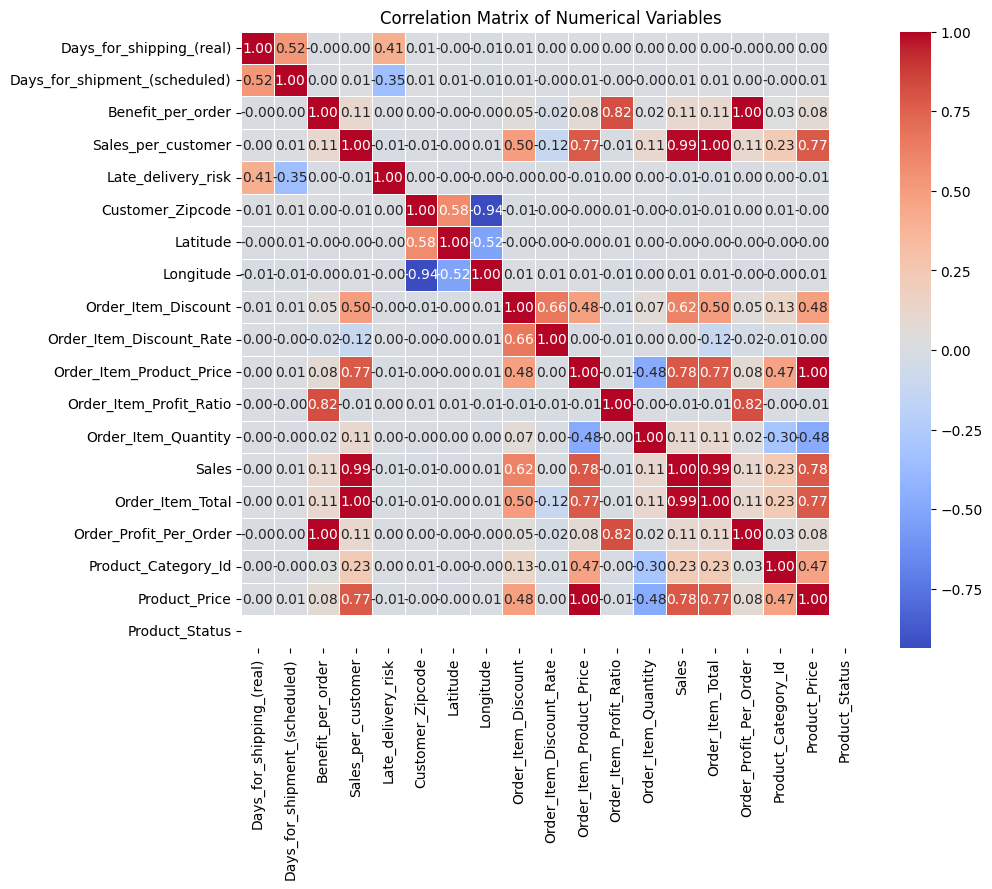

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numerical_df = filtered_df.select_dtypes(include='number')

# Calculate the correlation matrix of the numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [83]:
# By using  the correlation matrix and Further analysis using excel  tells that sales_per_customer and Order_total_item 
#are representing same data so  is being dropped
#product_status is being removed cause it has only 0 values. this column has no value for any analysis
#Benefit_per_order and Order_Profit_Per_Order represent same data so Order_Profit_Per_Order column/feature is being dropped
#Longitude has -0.94 collinearity with Customer_zipcode so it is being dropped

column_drop=['Order_Profit_Per_Order','Product_Status','Order_Item_Total','Longitude']
filtered_df.drop(column_drop,axis=1,inplace=True)


#Shipping_Mode  is beig dropped as it is having correlation of 0.9with shipping_day(sheduled) and for predicting late delivery risk and to have
#much more interpretability of the result shipping_day(sheduled) is being kept
#Sales_per_customer and Sales columns are representing same data so sales is being removed as Sales_per_customer has more analytical value
#dropping both columns Order_Item_Discount_Rate ,Order_Item_Product_Price and  Order_Item_Discount as they have no analytical value for us

filtered_df.drop(['Shipping_Mode','Sales'],axis=1,inplace=True)


KeyError: "['Order_Profit_Per_Order', 'Product_Status', 'Order_Item_Total'] not found in axis"

In [86]:

# List of columns you want to one-hot encode
columns_to_encode = [
   'Category_Name', 'Customer_City', 'Customer_Segment', 'Customer_Street', 
    'Customer_Country', 'Customer_State', 'Department_Name', 
    'Order_Country', 'Order_State', 'Order_City', 'Order_Region','Type','Market']

# One-hot encode the specified columns
df_encoded = pd.get_dummies(filtered_df, columns=columns_to_encode,drop_first=True)

# Display the new DataFrame with one-hot encoded columns
df_encoded.head()


,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Customer_Zipcode,Latitude,Longitude,order_date_(DateOrders),...,Order_Region_West Asia,Order_Region_West of USA,Order_Region_Western Europe,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA
1,5,4,-249.09,311.35999,Late delivery,1,725.0,18.27945,-66.03706,1/13/2018,...,False,False,False,False,False,True,False,False,True,False
3,3,4,22.86,304.81000,Advance shipping,0,90027.0,34.12595,-118.29102,1/13/2018,...,False,False,False,True,False,False,False,False,True,False
7,2,1,68.43,285.14001,Late delivery,1,33162.0,25.92887,-80.16287,1/13/2018,...,False,False,False,False,False,True,False,False,True,False
19,0,0,87.18,311.35999,Shipping on time,0,60056.0,42.04831,-87.96134,1/13/2018,...,False,False,False,False,True,False,False,False,True,False
22,4,2,22.37,298.25000,Late delivery,1,95670.0,38.61177,-121.28287,1/13/2018,...,False,False,False,False,False,True,False,False,True,False


In [87]:
#for getting a meaningful information from them these columns are converted into datetime type
# Convert 'order_date_(DateOrders)' and 'shipping_date_(DateOrders)' to datetime, if applicable
df_encoded['order_date_(DateOrders)'] = pd.to_datetime(df_encoded['order_date_(DateOrders)'])
df_encoded['shipping_date_(DateOrders)'] = pd.to_datetime(df_encoded['shipping_date_(DateOrders)'])

#so as to make model understasnd this data we took features from date time columns in followng ways
df_encoded['order_year'] = df_encoded['order_date_(DateOrders)'].dt.year
df_encoded['order_month'] = df_encoded['order_date_(DateOrders)'].dt.month
df_encoded['order_day'] = df_encoded['order_date_(DateOrders)'].dt.day
df_encoded['shipping_year'] = df_encoded['shipping_date_(DateOrders)'].dt.year
df_encoded['shipping_month'] = df_encoded['shipping_date_(DateOrders)'].dt.month
df_encoded['shipping_day'] = df_encoded['shipping_date_(DateOrders)'].dt.day

# Drop original date columns

df_encoded = df_encoded.drop(['order_date_(DateOrders)', 'shipping_date_(DateOrders)'], axis=1)
df_encoded

,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Customer_Zipcode,Latitude,Longitude,Order_Item_Discount,...,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
1,5,4,-249.09000,311.35999,Late delivery,1,725.0,18.27945,-66.03706,16.39,...,False,False,True,False,2018,1,13,2018,1,18
3,3,4,22.86000,304.81000,Advance shipping,0,90027.0,34.12595,-118.29102,22.94,...,False,False,True,False,2018,1,13,2018,1,16
7,2,1,68.43000,285.14001,Late delivery,1,33162.0,25.92887,-80.16287,42.61,...,False,False,True,False,2018,1,13,2018,1,15
19,0,0,87.18000,311.35999,Shipping on time,0,60056.0,42.04831,-87.96134,16.39,...,False,False,True,False,2018,1,13,2018,1,13
22,4,2,22.37000,298.25000,Late delivery,1,95670.0,38.61177,-121.28287,29.50,...,False,False,True,False,2018,1,13,2018,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180493,2,4,95.12000,327.98001,Advance shipping,0,32822.0,28.51627,-81.30583,72.00,...,False,False,True,False,2016,1,16,2016,1,18
180494,2,4,116.15000,319.98001,Advance shipping,0,32822.0,28.51627,-81.30583,80.00,...,False,False,True,False,2016,1,16,2016,1,18
180498,3,4,-337.10001,391.98001,Advance shipping,0,11757.0,40.68666,-73.37553,8.00,...,False,False,True,False,2016,1,16,2016,1,19
180512,6,4,86.40000,319.98001,Late delivery,1,725.0,18.24526,-66.37062,80.00,...,False,False,True,False,2016,1,16,2016,1,22


In [88]:
df_encoded.select_dtypes(include='object').columns

Index(['Delivery_Status', 'Order_Status', 'Product_Name'], dtype='object')

In [89]:
##as there is already Category_Name column which is much more significant for prediction analysis and also Product_Name column has 118 unique 
##values which causes increase in data without adding any significant value to it, so its being dropped 

In [90]:
df_encoded.drop(['Product_Name'],axis=1,inplace=True)


In [91]:
## Delivery_Status repersents same data as our Target columns so it is being dropped
df_encoded.drop(columns=['Delivery_Status'],axis=1,inplace=True)
categoricol_columns=df_encoded.select_dtypes(include='object').columns 

In [92]:
##Lable encoding the ordinal type data
unique_val=df_encoded[categoricol_columns].nunique()
print(unique_val)

Order_Status    9
dtype: int64


In [93]:
df_encoded['Order_Status'].value_counts()

Order_Status
COMPLETE           13875
PENDING_PAYMENT     9232
PROCESSING          5161
PENDING             4868
CLOSED              4568
ON_HOLD             2218
SUSPECTED_FRAUD     1104
CANCELED             789
PAYMENT_REVIEW       435
Name: count, dtype: int64

In [94]:
df_encoded=pd.get_dummies(df_encoded,columns=['Order_Status'],drop_first=True)

In [95]:
df_encoded.shape
#df_encoded.select_dtypes(include='object')

(42250, 5042)

# Random Forest 


In [103]:
#making a copy of encoded df 
# Step 1: Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

df=df_encoded.copy()


In [104]:
#checking for balance in the target variable
df['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    23181
0    19069
Name: count, dtype: int64

In [105]:


# Select features (X) and target (y)
X = df.drop(columns=['Late_delivery_risk'])
y = df['Late_delivery_risk']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

# Step 5: Feature Scaling (optional for Random Forest, but good practice)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Define the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to test
param_grid = {
    'n_estimators': [300],
    'max_depth': [6],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']  # Class weight for imbalanced classes
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the test set using the best parameters
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))


# Get feature importance
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for easier visualization
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_df)

# Visualize the feature importances
#plt.figure(figsize=(8, 6))
#sns.barplot(x='Importance', y='Feature', data=feature_df, palette="viridis")
#plt.title('Feature Importance - Random Forest Classifier')
#plt.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Best Accuracy: 0.9165269782276655
Accuracy: 0.8925494651140774

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4767
           1       0.90      0.90      0.90      5796

    accuracy                           0.89     10563
   macro avg       0.89      0.89      0.89     10563
weighted avg       0.89      0.89      0.89     10563

Feature Importance:
                            Feature  Importance
0          Days_for_shipping_(real)    0.097223
5040   Order_Status_SUSPECTED_FRAUD    0.066834
1     Days_for_shipment_(scheduled)    0.064892
5022                  Type_TRANSFER    0.032182
5034          Order_Status_COMPLETE    0.010680
...                             ...         ...
2378             Orde

#  Predicting late delivery risk

In [106]:
ldp_df=df_encoded.loc[:,['Days_for_shipping_(real)','Days_for_shipment_(scheduled)','Late_delivery_risk','Order_Status_SUSPECTED_FRAUD']]
ldp_df 

,Days_for_shipping_(real),Days_for_shipment_(scheduled),Late_delivery_risk,Order_Status_SUSPECTED_FRAUD
1,5,4,1,False
3,3,4,0,False
7,2,1,1,False
19,0,0,0,False
22,4,2,1,False
...,...,...,...,...
180493,2,4,0,False
180494,2,4,0,False
180498,3,4,0,False
180512,6,4,1,False


# Checking for Outliers

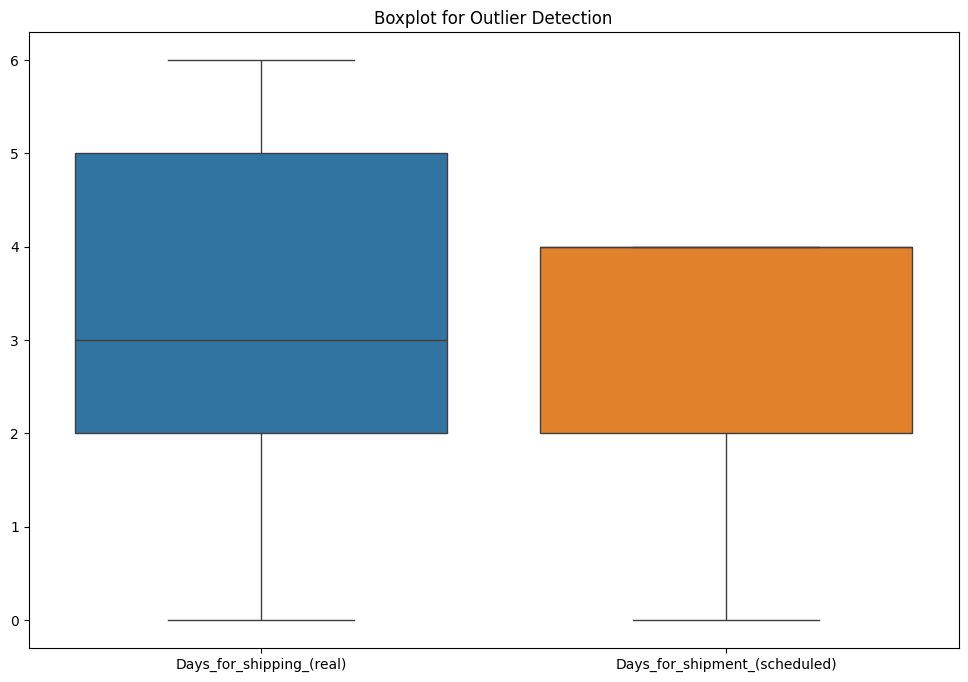

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for each of the columns to visualize the outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=ldp_df[['Days_for_shipping_(real)','Days_for_shipment_(scheduled)']])
plt.title("Boxplot for Outlier Detection")
plt.show()

# Logistic Regression Model Training

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# Define features (X) and target (y)
X = ldp_df[['Days_for_shipping_(real)', 'Order_Status_SUSPECTED_FRAUD', 'Days_for_shipment_(scheduled)']]
y = ldp_df['Late_delivery_risk']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler_lr=StandardScaler()

X_train_scaled = scaler_lr.fit_transform(X_train)
X_test_scaled= scaler_lr.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2', 'l1'],  # Penalty term (L2 or L1 regularization)
    'solver': ['liblinear', 'saga'],  # Solvers that can be used with different penalties
    'max_iter': [500, 1000],  # Maximum number of iterations for optimization
    'class_weight': ['balanced']  # Add class_weight balanced for handling class imbalance
}


# Initialize the LogisticRegression model
logreg_model = LogisticRegression(random_state=42)

# Initialize GridSearchCV with the Logistic Regression model and parameter grid
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, 
                           n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best Logistic Regression model based on the grid search
best_logreg_model = grid_search.best_estimator_

# Make predictions with the best model on the test set
y_pred = best_logreg_model.predict(X_test_scaled)

# Print classification report for the test set
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4732
           1       0.98      1.00      0.99      5831

    accuracy                           0.99     10563
   macro avg       0.99      0.99      0.99     10563
weighted avg       0.99      0.99      0.99     10563



# SVM Model Training


In [113]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define features (X) and target (y)
X = ldp_df[['Days_for_shipping_(real)', 'Order_Status_SUSPECTED_FRAUD', 'Days_for_shipment_(scheduled)']]
y = ldp_df['Late_delivery_risk']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale',0.1, 0.01],  # Kernel coefficient (only for 'rbf', 'poly' kernels)
   
}

# Initialize the SVM model (without any specific parameters)
svm_model = SVC(random_state=42)

# Initialize GridSearchCV with the SVM model and parameter grid
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, 
                           n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best SVM model based on the grid search
best_svm_model = grid_search.best_estimator_

# Make predictions with the best model on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Print classification report for the test set
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

# SNN

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#train test split 

X = ldp_df[['Days_for_shipping_(real)', 'Order_Status_SUSPECTED_FRAUD', 'Days_for_shipment_(scheduled)']]

y = ldp_df['Late_delivery_risk']  # Replace 'target_column' with your actual target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()

# Add input layer with 3 nodes (since you have 3 features)
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer - adjust number of units based on your target variable
# For classification: adjust units based on number of classes (e.g., 1 for binary, more for multi-class)
model.add(Dense(units=1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # Use 'mean_squared_error' for regression

# Fit the model to the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict with the trained model
y_pred = model.predict(X_test_scaled)

Epoch 1/50
1057/1057 [==============================] - 3s 2ms/step - loss: 0.1004 - accuracy: 0.9833 - val_loss: 0.0477 - val_accuracy: 0.9909
Epoch 2/50
1057/1057 [==============================] - 2s 2ms/step - loss: 0.0558 - accuracy: 0.9889 - val_loss: 0.0466 - val_accuracy: 0.9909
Epoch 3/50
1057/1057 [==============================] - 2s 2ms/step - loss: 0.0552 - accuracy: 0.9889 - val_loss: 0.0476 - val_accuracy: 0.9909
Epoch 4/50
1057/1057 [==============================] - 2s 2ms/step - loss: 0.0549 - accuracy: 0.9889 - val_loss: 0.0482 - val_accuracy: 0.9909
Epoch 5/50
1057/1057 [==============================] - 2s 2ms/step - loss: 0.0548 - accuracy: 0.9889 - val_loss: 0.0467 - val_accuracy: 0.9909
Epoch 6/50
1057/1057 [==============================] - 2s 2ms/step - loss: 0.0550 - accuracy: 0.9889 - val_loss: 0.0477 - val_accuracy: 0.9909
Epoch 7/50
1057/1057 [==============================] - 2s 2ms/step - loss: 0.0547 - accuracy: 0.9889 - val_loss: 0.0468 - val_accuracy: